In [4]:
import pandas as pd

def get_weekly_deaths(country):
    df = pd.read_csv(f'../../data/worldometers/{country}.csv')
    weekly_deaths = []
    for week_end in range(len(df)-1, 6, -7):
        weekly_deaths.append(df.at[week_end,'coronavirus-deaths-linear'] - df.at[week_end-7,'coronavirus-deaths-linear'])
    return list(reversed(weekly_deaths))

countries = ['france', 'italy', 'spain']

country_curves = []
for country in countries:
    country_curves.append(get_weekly_deaths(country))

country_curves

[[1, 2, 44, 216, 1067, 2701, 6837, 6298, 4173, 2747],
 [12, 95, 720, 2151, 4525, 5652, 4514, 3976, 3440, 2597],
 [0, 0, 17, 277, 1478, 5031, 5838, 4568, 3244, 2737]]

In [5]:
us_df = pd.read_csv(f'../../data/covid_tracker/us.csv').fillna(0)
us_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200427,56,981134,4612361.0,4077.0,54971.0,97782.0,9655.0,3720.0,4867.0,...,97782.0,5597572,5593495,5593495,0.0,1163.0,1972.0,113629.0,21876.0,135505.0
1,20200426,56,959258,4498732.0,4445.0,55030.0,95810.0,14831.0,2571.0,5121.0,...,95810.0,5462435,5457990,5457990,0.0,1095.0,1067.0,180977.0,27016.0,207993.0
2,20200425,56,932242,4317755.0,5315.0,56344.0,94743.0,15020.0,2516.0,5266.0,...,94743.0,5255312,5249997,5249997,0.0,1818.0,1377.0,237699.0,35936.0,273635.0
3,20200424,56,896306,4080056.0,4396.0,56075.0,93366.0,15078.0,2468.0,5187.0,...,93366.0,4980758,4976362,4976362,0.0,1866.0,2258.0,200684.0,34518.0,235202.0
4,20200423,56,861788,3879372.0,4258.0,57840.0,91108.0,15163.0,2428.0,5464.0,...,91108.0,4745418,4741160,4741160,0.0,1877.0,1309.0,163526.0,31565.0,195091.0


In [6]:
us_weekly_deaths = []

for week_end in range(2, len(us_df)-7, 7):
    us_weekly_deaths.append(us_df.at[week_end,'death'] - us_df.at[week_end+7,'death'])
us_weekly_deaths.reverse()

In [7]:
country_curves.append(us_weekly_deaths)

In [8]:
curve_len = min([len(c) for c in country_curves])
country_curves = [c[-curve_len:] for c in country_curves]
country_curves

[[1, 2, 44, 216, 1067, 2701, 6837, 6298, 4173, 2747],
 [12, 95, 720, 2151, 4525, 5652, 4514, 3976, 3440, 2597],
 [0, 0, 17, 277, 1478, 5031, 5838, 4568, 3244, 2737],
 [0.0, 5.0, 22.0, 36.0, 243.0, 1732.0, 6449.0, 12199.0, 13871.0, 13512.0]]

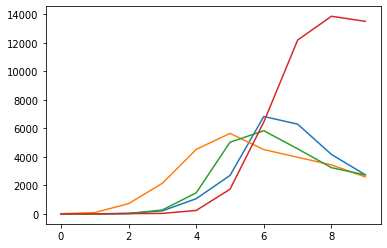

In [9]:
import matplotlib.pyplot as plt
for c in country_curves:
    plt.plot(c)
plt.show()

In [10]:
def get_weekly_cases(country):
    df = pd.read_csv(f'../../data/worldometers/{country}.csv')
    weekly_deaths = []
    for week_end in range(len(df)-1, 6, -7):
        weekly_deaths.append(df.at[week_end,'coronavirus-cases-linear'] - df.at[week_end-7,'coronavirus-cases-linear'])
    return list(reversed(weekly_deaths))

countries = ['france', 'italy', 'spain']

case_curves = []
for country in countries:
    case_curves.append(get_weekly_cases(country))

case_curves

[[6, 267, 1996, 6853, 16099, 31756, 46072, 30583, 22300, 10476],
 [467, 2619, 9373, 23251, 38673, 36188, 28848, 25733, 22172, 16264],
 [0, 82, 590, 7314, 20780, 51342, 51536, 35185, 31843, 27955]]

In [17]:
us_weekly_cases = []

for week_end in range(0, len(us_df)-7, 7):
    us_weekly_cases.append(us_df.at[week_end,'positive'] - us_df.at[week_end+7,'positive'])
us_weekly_cases.reverse()

In [18]:
us_weekly_cases

[0, 1, 0, 0, 51, 960, 5117, 40883, 118508, 197944, 213410, 199544, 204715]

In [19]:
states_df = pd.read_csv(f'../../data/covid_tracker/states.csv').fillna(0)
states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200427,AK,345.0,15911.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,16256.0,16256.0,16256.0,2,0.0,0.0,75.0,4.0,79.0
1,20200427,AL,6499.0,67498.0,0.0,0.0,872.0,0.0,335.0,0.0,...,872.0,73997.0,73997.0,73997.0,1,6.0,27.0,217.0,229.0,446.0
2,20200427,AR,3017.0,37440.0,0.0,109.0,0.0,0.0,0.0,25.0,...,0.0,40457.0,40457.0,40457.0,5,1.0,0.0,912.0,76.0,988.0
3,20200427,AS,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200427,AZ,6716.0,59827.0,0.0,647.0,1051.0,328.0,0.0,200.0,...,1051.0,66543.0,66543.0,66543.0,4,0.0,14.0,1542.0,190.0,1732.0


In [14]:
georgia_df = states_df[states_df['state'] == 'GA']
georgia_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
11,20200427,GA,23913.0,103256.0,0.0,0.0,4681.0,0.0,1057.0,0.0,...,4681.0,127169.0,127169.0,127169.0,13,59.0,322.0,3434.0,512.0,3946.0
67,20200426,GA,23401.0,99822.0,0.0,0.0,4359.0,0.0,0.0,0.0,...,4359.0,123223.0,123223.0,123223.0,13,8.0,33.0,3503.0,706.0,4209.0
123,20200425,GA,22695.0,96319.0,0.0,0.0,4326.0,0.0,0.0,0.0,...,4326.0,119014.0,119014.0,119014.0,13,12.0,105.0,11290.0,548.0,11838.0
179,20200424,GA,22147.0,85029.0,0.0,0.0,4221.0,0.0,0.0,0.0,...,4221.0,107176.0,107176.0,107176.0,13,20.0,152.0,5479.0,635.0,6114.0
235,20200423,GA,21512.0,79550.0,0.0,0.0,4069.0,0.0,0.0,0.0,...,4069.0,101062.0,101062.0,101062.0,13,36.0,110.0,6218.0,772.0,6990.0


In [16]:
import numpy as np

georgia_df.index = range(len(georgia_df))
ga_weekly_cases = []

for week_end in range(0, len(georgia_df)-7, 7):
    ga_weekly_cases.append(georgia_df.at[week_end,'positive'] - georgia_df.at[week_end+7,'positive'])
ga_weekly_cases.reverse()

np.array(ga_weekly_cases) / 7.0

array([ 15.57142857,  93.        , 291.        , 643.57142857,
       857.28571429, 804.57142857, 709.42857143])